In [1]:
#dependencies
import pandas as pd
import numpy as np

In [2]:
#import data from combined csv
df = pd.read_csv('data/combined_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()
 

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,US
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,US
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,US


In [3]:
#talk to group about dropping the following video_id's
#'#NAME?', '#VALUE!'
df_id_drop = df.drop(df[df['video_id'] == '#NAME?'].index, inplace = True)
df_value_drop = df.drop(df[df['video_id'] == '#VALUE!'].index, inplace = True)

In [4]:
#talk to group about dropping the following video_id's
#when likes and dislikes == 0 or comment_count == 0 or video_error_or_removed == True

df_like_drop = df.drop(df[df['likes'] == 0].index, inplace = True)
df_dislikes_drop = df.drop(df[df['dislikes'] == 0].index, inplace = True)
df_comment_count_drop = df.drop(df[df['comment_count'] == 0].index, inplace = True)
df_video_error_or_removed = df.drop(df[df['video_error_or_removed'] == True].index, inplace = True)
df.head()
df.to_csv('data/cleaned_data.csv')

In [5]:
#the data appears to include data for the following time range, by trending date:
#dec 1, 2017 through May 31, 2018
df_2 = df.loc[:,["Country Code", "video_id"]]

In [6]:
#compare number of views to likes/dislikes votes?
#compare number of views to comments?
# How long a video trends to number of views?
#Top Genres?
#Most commented, Most disliked, Most liked, longest trending video, most viewed video?
total_count = len(df["category_id"].unique())
total_count

17

In [7]:
#dataframes for each country
US = df.loc[df["Country Code"]=="US"]
MX = df.loc[df["Country Code"]=="MX"]
CA = df.loc[df["Country Code"]=="CA"]
RU = df.loc[df["Country Code"]=="RU"]
DE = df.loc[df["Country Code"]=="DE"]
FR = df.loc[df["Country Code"]=="FR"]
GB = df.loc[df["Country Code"]=="GB"]
IN = df.loc[df["Country Code"]=="IN"]
JP = df.loc[df["Country Code"]=="JP"]
KR = df.loc[df["Country Code"]=="KR"]


In [8]:
#dataframes created to display country, video_id, views, likes

data_us = US.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_us
data_mx = MX.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_mx

data_ca = CA.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_ca

data_ru = RU.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_ru

data_de = DE.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_de

data_fr = FR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_fr
 
data_gb = GB.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_gb

data_in = IN.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_in

data_jp = JP.loc[:,["Country Code", "video_id","views", "likes", "dislikes"]]
#data_jp

data_kr = KR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes"]]
#data_kr

In [9]:
#sorted by views to see the highest trending video by country
trending_us = data_us.sort_values("views", axis=0, ascending=False)
trending_us.head(10)



,Country Code,video_id,views,likes,dislikes
38547,US,VYOjWnS4cMY,225211923,5023450,343541
38345,US,VYOjWnS4cMY,220490543,4962403,338105
38146,US,VYOjWnS4cMY,217750076,4934188,335462
37935,US,VYOjWnS4cMY,210338856,4836448,326902
37730,US,VYOjWnS4cMY,205643016,4776680,321493
37531,US,VYOjWnS4cMY,200820941,4714942,316129
37333,US,VYOjWnS4cMY,196222618,4656929,311042
37123,US,VYOjWnS4cMY,190950401,4594931,305435
36913,US,VYOjWnS4cMY,184446490,4512326,298157
36710,US,VYOjWnS4cMY,179045286,4437175,291098


In [16]:
trending_videos = df.groupby(["Country Code"]).count() ["video_id"]
trending_videos = pd.DataFrame(trending_videos)
trending_videos


,video_id
Country Code,
CA,39900
DE,38878
FR,38678
GB,37998
IN,35109
JP,17427
KR,32088
MX,38234
RU,37732


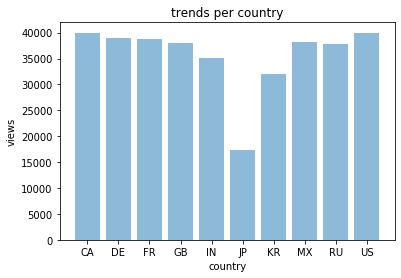

In [22]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

objects = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US'] 
y_pos = np.arange(len(trending_videos))
performance = [ 39900, 38878,38678,37998,35109,17427,32088,38234,37732,39983]
axis = np.arange(len(objects))
takelocations = [value for value in axis]

plt.bar(y_pos, trending_videos["video_id"], align='center', alpha=0.5)
plt.xticks(takelocations, objects)
plt.ylabel('views')
plt.xlabel('country')
plt.title('trends per country')

plt.show()

In [26]:
trending_mx = data_mx.sort_values("views", axis=0, ascending=False)
trending_mx.head(10)

,Country Code,video_id,views,likes,dislikes
285662,MX,FlsCjmMhFmw,100912384,2656698,1353667
285399,MX,FlsCjmMhFmw,75969469,2251864,1127834
284272,MX,6ZfuNTqbHE8,74789251,2444976,46173
284005,MX,6ZfuNTqbHE8,66637636,2331375,41155
316194,MX,7C2z4GqqS5E,62796390,4470923,119053
316047,MX,7C2z4GqqS5E,62796390,4470923,119053
283797,MX,6ZfuNTqbHE8,56370607,2157755,34079
285196,MX,FlsCjmMhFmw,52611730,1891855,884978
302234,MX,_I_D_8Z4sJE,50896717,550478,20865
301949,MX,_I_D_8Z4sJE,40567774,448374,16682


In [27]:
trending_ca = data_ca.sort_values("views", axis=0, ascending=False)
trending_ca.head(10)

,Country Code,video_id,views,likes,dislikes
46849,CA,FlsCjmMhFmw,137843120,3014479,1602383
46572,CA,FlsCjmMhFmw,125431369,2912715,1545018
46347,CA,FlsCjmMhFmw,113876217,2811217,1470387
46146,CA,FlsCjmMhFmw,100911567,2656678,1353655
75310,CA,VYOjWnS4cMY,98938809,3037318,161813
45648,CA,6ZfuNTqbHE8,89930713,2606665,53011
45400,CA,6ZfuNTqbHE8,87450245,2584675,52176
75080,CA,VYOjWnS4cMY,85092067,2735961,140711
45151,CA,6ZfuNTqbHE8,84281319,2555414,51008
77402,CA,7C2z4GqqS5E,80738011,5053338,165854


In [28]:
trending_ru = data_ru.sort_values("views", axis=0, ascending=False)
trending_ru.head(10)

,Country Code,video_id,views,likes,dislikes
275350,RU,7C2z4GqqS5E,62796390,4470923,119053
275500,RU,7C2z4GqqS5E,62796390,4470923,119053
244495,RU,FlsCjmMhFmw,52611730,1891836,884967
275190,RU,7C2z4GqqS5E,39349927,3880074,72707
273039,RU,VYOjWnS4cMY,31648454,1405392,51548
270401,RU,u9Mv98Gr5pY,27973210,850378,26543
244270,RU,FlsCjmMhFmw,24784870,1149238,483957
263271,RU,tCXGJQYZ9JA,24262331,1249412,64943
251506,RU,dfnCAmr569k,23198594,1404648,72534
242236,RU,kTlv5_Bs8aw,20565795,2320662,33228


In [29]:
trending_de = data_de.sort_values("views", axis=0, ascending=False)
trending_de.head(10)

,Country Code,video_id,views,likes,dislikes
87285,DE,FlsCjmMhFmw,113876217,2811217,1470386
87051,DE,FlsCjmMhFmw,100911567,2656675,1353652
85892,DE,6ZfuNTqbHE8,80360459,2513103,49170
86834,DE,FlsCjmMhFmw,75969469,2251819,1127810
85638,DE,6ZfuNTqbHE8,74789251,2444956,46172
118121,DE,7C2z4GqqS5E,73463137,4924056,156026
115934,DE,VYOjWnS4cMY,73432600,2478908,124291
85431,DE,6ZfuNTqbHE8,66637636,2331354,41154
117784,DE,7C2z4GqqS5E,65396157,4750254,141966
117529,DE,7C2z4GqqS5E,62796390,4470888,119046


In [30]:
trending_fr = data_fr.sort_values("views", axis=0, ascending=False)
trending_fr.head(10)

,Country Code,video_id,views,likes,dislikes
128012,FR,FlsCjmMhFmw,100911567,2656682,1353661
127710,FR,FlsCjmMhFmw,75969469,2251828,1127813
158572,FR,7C2z4GqqS5E,65396157,4750254,141966
158296,FR,7C2z4GqqS5E,62796390,4470923,119052
156390,FR,VYOjWnS4cMY,60776509,2183745,104379
127474,FR,FlsCjmMhFmw,52611730,1891827,884962
156139,FR,VYOjWnS4cMY,47169016,1841553,79716
124268,FR,TyHvyGVs42U,47078714,1763400,78228
144266,FR,_I_D_8Z4sJE,40567774,448371,16682
147425,FR,QwievZ1Tx-8,39980116,1420090,26137


In [31]:
trending_gb = data_gb.sort_values("views", axis=0, ascending=False)
trending_gb.head(10)

,Country Code,video_id,views,likes,dislikes
191806,GB,_I_D_8Z4sJE,424538912,2818771,149275
191606,GB,_I_D_8Z4sJE,413586699,2768654,145643
191402,GB,_I_D_8Z4sJE,402650804,2719005,142006
191205,GB,_I_D_8Z4sJE,392036878,2670723,138334
191009,GB,_I_D_8Z4sJE,382401497,2618320,134625
190818,GB,_I_D_8Z4sJE,372399338,2564815,131168
190635,GB,_I_D_8Z4sJE,362111555,2506788,127178
190446,GB,_I_D_8Z4sJE,349987176,2440754,122408
190255,GB,_I_D_8Z4sJE,339629489,2378829,118294
197854,GB,9jI-z9QN6g8,337621571,2581961,166549


In [32]:
trending_in = data_in.sort_values("views", axis=0, ascending=False)
trending_in.head(10)

,Country Code,video_id,views,likes,dislikes
207718,IN,FlsCjmMhFmw,125432237,2912710,1545017
207429,IN,FlsCjmMhFmw,113876217,2811216,1470387
207246,IN,FlsCjmMhFmw,100911567,2656672,1353650
206787,IN,6ZfuNTqbHE8,89930713,2606663,53011
206546,IN,6ZfuNTqbHE8,87449453,2584674,52176
206323,IN,6ZfuNTqbHE8,84281319,2555411,51008
206133,IN,6ZfuNTqbHE8,80360459,2513102,49170
207053,IN,FlsCjmMhFmw,75969469,2251815,1127805
205949,IN,6ZfuNTqbHE8,74789251,2444956,46172
205766,IN,6ZfuNTqbHE8,66637636,2331352,41154


In [33]:
trending_jp = data_jp.sort_values("views", axis=0, ascending=False)
trending_jp.head(10)

,Country Code,video_id,views,likes,dislikes
337172,JP,7C2z4GqqS5E,62796390,4470923,119053
337158,JP,7C2z4GqqS5E,62796390,4470923,119053
337186,JP,7C2z4GqqS5E,62796390,4470923,119053
337200,JP,7C2z4GqqS5E,62796390,4470923,119053
333203,JP,u9Mv98Gr5pY,39128403,1077732,35764
327486,JP,QwievZ1Tx-8,30180849,1242239,16903
332935,JP,u9Mv98Gr5pY,27973210,850380,26543
336146,JP,32sYGCOYJUM,27470728,753626,118983
336251,JP,32sYGCOYJUM,27470728,753645,118989
326877,JP,tCXGJQYZ9JA,24262331,1249414,64943


In [34]:
trending_kr = data_kr.sort_values("views", axis=0, ascending=False)
trending_kr.head(10)

,Country Code,video_id,views,likes,dislikes
346231,KR,FlsCjmMhFmw,113876217,2811223,1470388
346053,KR,FlsCjmMhFmw,100911567,2656686,1353663
345393,KR,6ZfuNTqbHE8,87450245,2584675,52176
372219,KR,7C2z4GqqS5E,87430865,5150839,172570
345125,KR,6ZfuNTqbHE8,84281319,2555414,51008
371958,KR,7C2z4GqqS5E,80738011,5053338,165854
344919,KR,6ZfuNTqbHE8,80360459,2513104,49170
345828,KR,FlsCjmMhFmw,75969469,2251837,1127817
344756,KR,6ZfuNTqbHE8,74789251,2444965,46172
371727,KR,7C2z4GqqS5E,73463137,4924056,156026
